In [1]:
from wordcloud import WordCloud, STOPWORDS
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.stop_words import ENGLISH_STOP_WORDS

In [2]:
df = pd.read_msgpack("./combined.msg")

In [3]:
df = df.reindex(np.random.permutation(df.index))
df['fakeness'] = 0
df.loc[df['type'] < 2, 'fakeness'] = 1

In [4]:
fake = df.loc[df['fakeness'] == 1].head(10000)
fake = fake['content'].values
fake = ' '.join(fake)
fake = [word for word in fake.split() if word not in ENGLISH_STOP_WORDS]

In [5]:
fake_wc = WordCloud(background_color = 'white',
                    width = 1200,
                    height = 1000,
                    stopwords=STOPWORDS).generate(' '.join(fake))

In [7]:
fake_wc.to_file('./fakecld.png')

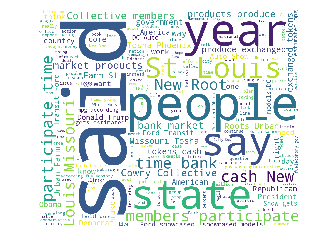

In [8]:
real = df.loc[df['fakeness'] == 0].head(10000)
real = real['content'].values
real = ' '.join(real)
real = [word for word in real.split() if word not in ENGLISH_STOP_WORDS]
real_wc = WordCloud(background_color= 'white',
                    width=1200,
                    height=1000,
                    stopwords=STOPWORDS).generate(' '.join(real))

In [9]:
real_wc.to_file('./realcld.png')